# **Support Vector Regression (SVR) - Regressão de Vetor Suporte**

As ideias do método SVR foram desenvolvidas pelo matemático Vladimir Vapnik, juntamente com seus colegas no AT&T Labs. O SVR é considerado um tipo de máquina de vetor de suporte (Support Vector Machine - SVM) que lida com regressão linear e não linear. 

O objetivo de um algoritmo SVR é encontrar um hiperplano em um espaço n-dimensional que classifique distintamente os pontos de dados. Os pontos de dados em ambos os lados do hiperplano que estão mais próximos do hiperplano são chamados de Vetores de Suporte. Estes influenciam a posição e orientação do hiperplano e, assim, ajudam a construir o SVM.

Em relação os modelos de regressão linear que estudamos, o objetivo é minimizar a soma dos erros quadrados, por exemplo, usando os Mínimos Quadrados Ordinários ou Gradiente Descentente.

Por sua vez, o SVR possibilita a flexibilidade de definir o quanto de erro é aceitável em nosso modelo e encontrará uma linha apropriada (ou hiperplano em dimensões mais altas) para ajustar os dados.

A função objetivo do SVR é minimizar os coeficientes, não o erro quadradático. O SVR permite escolher quão tolerantes somos a erros, tanto por meio de uma margem de erro aceitável (ϵ) quanto por meio do ajuste de nossa tolerância ao sair dessa taxa de erro aceitável. 

Como parece no gráfico abaixo, a missão é encaixar o maior número possível de instâncias entre as linhas, limitando as violações de margem.

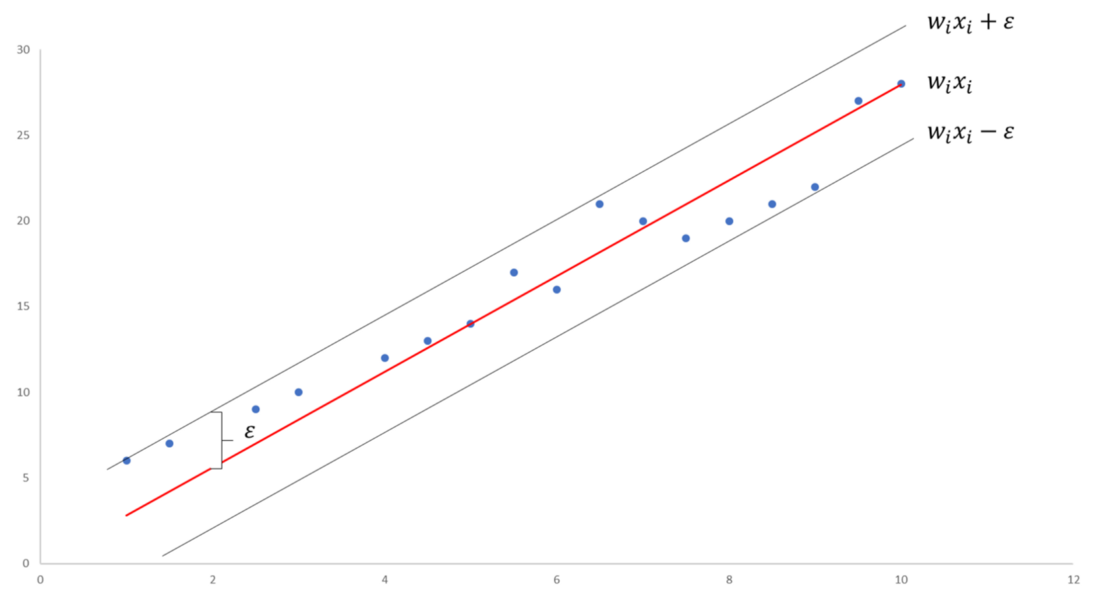


Vantagens:

*  É robusto a outliers.
*  O modelo pode ser facilmente atualizado.
*  Possui excelente capacidade de generalização, com alta precisão de previsão.
*  Sua implementação é fácil.

Desvantagens:

*  Eles não são adequados para grandes conjuntos de dados.
*  Nos casos em que o número de recursos para cada ponto de dados exceder o número de amostras de dados de treinamento, o SVM terá um desempenho inferior.


# Exemplo

### 1. Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2. Importando os dados

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:, -1]

X.replace([np.inf, -np.inf], np.nan, inplace=True)#transformando valores infinitos em NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)#transformando valores infinitos em NaN

X.dropna(inplace=True) # remover valores NaN
y.dropna(inplace=True) # remover valores NaN

print(len(X))
print(len(y))

X = X.values
y = y.values
print(y)

10
10
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### 3. Padronização dos Dados

O Modelo SVR não apresenta uma equação explícita, como os modelos de regressão apresentados em aulas antetiores. Consequentemente, o SVR tem seu desempenho prejudicado em situações em que as variáveis dependentes e independentes estão em diferentes escalas. Dessa forma, antes do treinamento e após a divisão dos dados em treino e teste, devemos realizar a padronização ou normalização dos dados quando necessário.

In [4]:
from sklearn.preprocessing import StandardScaler
#print(X)
#print("******")
print(y)
sc_X = StandardScaler()
sc_y = StandardScaler()

y = y.reshape(len(y),1)

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#print(X)
#print('******')
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### 4. Treinamento do Modelo SVR

In [5]:
from sklearn.svm import SVR
modelo = SVR(kernel = 'rbf')
modelo.fit(X, y)

C:\Users\gilc4\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### 5. Prevendo os resultados

In [6]:
result = modelo.predict(sc_X.transform([[6.5]])).reshape(-1,1)
sc_y.inverse_transform(result)

array([[170370.0204065]])

### 6. Visualizando os resultados

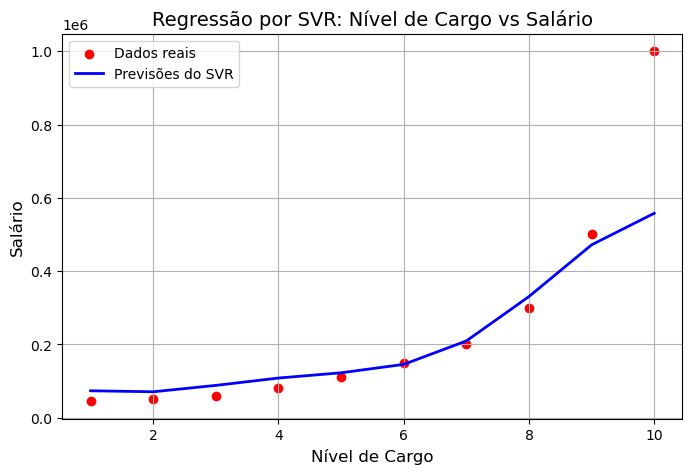

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar o gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red', label='Dados reais')

# Plotar a linha de regressão do modelo
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(modelo.predict(X).reshape(-1, 1)), 
         color='blue', label='Previsões do SVR', linewidth=2)

plt.title('Regressão por SVR: Nível de Cargo vs Salário', fontsize=14)
plt.xlabel('Nível de Cargo', fontsize=12)
plt.ylabel('Salário', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(True)
plt.show()
